# Μετασχηματισμός και ανάλυση πρωτογενών δεδομένων

Κατεβάζουμε τα δεδομένα

In [32]:
import gdown
!gdown 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /home/pantgram/Groceries Analyzer/GroceriesInitial.csv
100%|████████████████████████████████████████| 823k/823k [00:00<00:00, 4.55MB/s]


Φορτώνουμε τα δεδομένα σε ένα Pandas DataFrame.

In [33]:
# importing libraries
import numpy as np
import pandas as pd

groceries_data = pd.read_csv('GroceriesInitial.csv', header='infer')

Περιήγουμαστε στα δεδομένα

In [34]:
groceries_data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
groceries_data.describe()

,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Χρήσιμες βιβλιοθήκες για την οπτικοποίηση των δεδομένων

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

Βλέπουμε την διακύμανση των τιμων της αξίας συναλαγής.
Παρατηρούμε ότι οι περισσότερες συναλαγές είχαν αξία μικρότερη απο 5, ενώ λίγες πλησιάζουν την ανώτατη τιμή 25.1

<Axes: ylabel='Frequency'>

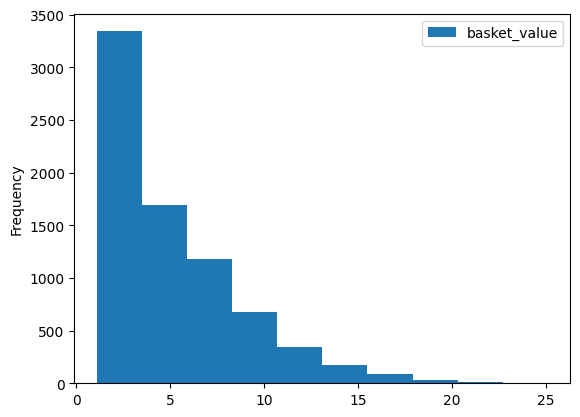

In [37]:
groceries_data.plot(kind='hist', y='basket_value')

Αντίστοιχα,βλέπουμε την διακύμανση των τιμων του πλήθους ημερών που πέρασαν από τη μέρα της συναλλαγής. Παρατηρούμε οτι οι μέγαλο πλήθος των συναλλαγών εγίνε σε λιγότερες απο 10 μέρες,και παράλληλα σε περισσότερες απο 70 ημέρες.
Σε αυτά τα διαστήματα , επομένως είχαμε αύξηση των πελατών.
Ενδιάμεσα, το πλήθος των συνναλαγών καθιστάται σταθερό.

<Axes: ylabel='Frequency'>

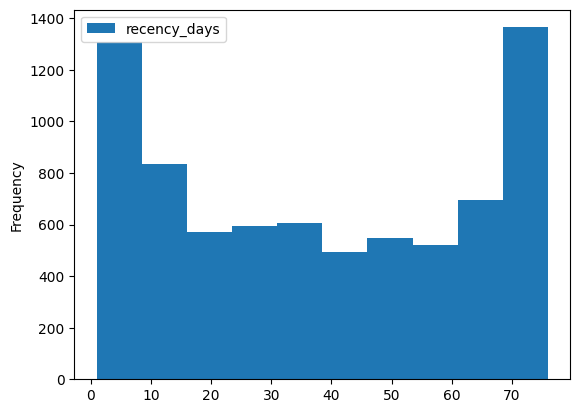

In [38]:
groceries_data.plot(kind='hist',y='recency_days')

<Axes: xlabel='basket_value', ylabel='recency_days'>

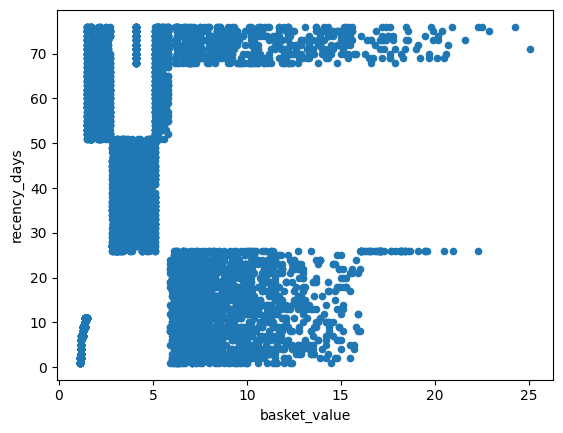

In [39]:
groceries_data.plot(kind='scatter', x='basket_value',y='recency_days')

Δημιουργούμε την λίστα συναλλαγών

In [40]:
transacts = []
transactions_data = groceries_data.loc[:, groceries_data.columns.drop(['id','basket_value','recency_days'])]
for i in range(0, 7536):
  #Populating a list of transactions
  transacts.append([str(transactions_data.values[i,j]) for j in range(0, 32)])

Κραταμε τις συναλλαγές που θέλουμε




In [41]:
desired_items = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']
filtered_items = [[item for item in purchase if item in desired_items] for purchase in transacts]

Μετατρέπουμε σε δυαδική μορφή τις συναλαγές

In [42]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
transaction_binary = te.fit(filtered_items).transform(filtered_items)
transaction_binary=transaction_binary.astype("int")
transaction_binary=pd.DataFrame(transaction_binary, columns=te.columns_)

Δημιουργούμε τις κατηγορίες αξίας καλαθιών

In [43]:
transaction_binary['basket_value_category']=pd.qcut(groceries_data['basket_value'], 3, labels=['low_value_basket','medium_value_basket','high_value_basket'])
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket


# Μάθηση κανόνων συσχέτισης με την μέθοδο Apriori

Τρέχουμε για τα προϊόντα

In [44]:
from apyori import apriori
print('min_support=0.001, Number of rules:', len(list(apriori(filtered_items, min_support=0.001))))
print('min_support=0.005, Number of rules:', len(list(apriori(filtered_items, min_support=0.005))))
print('min_support=0.01,  Number of rules:', len(list(apriori(filtered_items, min_support=0.01))))
print('min_support=0.05,  Number of rules:', len(list(apriori(filtered_items, min_support=0.05))))
print('min_support=0.1,   Number of rules:', len(list(apriori(filtered_items, min_support=0.1))))
print('min_support=0.5,   Number of rules:', len(list(apriori(filtered_items, min_support=0.5))))
print('min_support=1,     Number of rules:', len(list(apriori(filtered_items, min_support=1))))

min_support=0.001, Number of rules: 758
min_support=0.005, Number of rules: 230
min_support=0.01,  Number of rules: 124
min_support=0.05,  Number of rules: 22
min_support=0.1,   Number of rules: 11
min_support=0.5,   Number of rules: 0
min_support=1,     Number of rules: 0


In [45]:
results = list(apriori(filtered_items, min_support=0.01, min_lift=1.11))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]} with Confidence: {rule.confidence:.2f}')

['other vegetables', 'root vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.61
['citrus fruit', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.59
['tropical fruit', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.58
['tropical fruit', 'root vegetables'] -> ['whole milk'] with Confidence: 0.57
['root vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.56
['whole milk', 'root vegetables', 'yogurt'] -> ['other vegetables'] with Confidence: 0.54
['rolls/buns', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['tropical fruit', 'yogurt'] -> ['whole milk'] with Confidence: 0.52
['citrus fruit', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['pastry', 'yogurt'] -> ['whole milk'] with Confidence: 0.52
['sausage', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['other vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.51
['rolls/buns', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.50
['ro

Δημιουργουμε την λιστα προιόντων και με τη διακριτοποιημένη αξία καλαθιού και τρέχουμε για τα προϊόντα και την
διακριτοποιημένη αξία καλαθιού

In [46]:
import copy
filtered_items_bc = copy.deepcopy(filtered_items)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_bc[i].append(transaction_binary['basket_value_category'][i])

print('min_support=0.002, Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.002))))
print('min_support=0.006, Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.006))))
print('min_support=0.03,  Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.03))))
print('min_support=0.08,  Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.08))))
print('min_support=0.12,   Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.12))))
print('min_support=0.5,   Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.5))))
print('min_support=1,     Number of rules:', len(list(apriori(filtered_items_bc, min_support=1))))

min_support=0.002, Number of rules: 1001
min_support=0.006, Number of rules: 442
min_support=0.03,  Number of rules: 91
min_support=0.08,  Number of rules: 24
min_support=0.12,   Number of rules: 14
min_support=0.5,   Number of rules: 0
min_support=1,     Number of rules: 0


Βλέπουμε οτι το sausage βρίσκεται στα πρώτα σε confidence και συνδυάζεται παντα με high_value_basket. Επομένως, θεωρώ οτι αυτό ειναι το πιο ακριβό προϊόν πιθανότατα.

In [47]:
results = list(apriori(filtered_items_bc, min_support=0.03, min_lift=1.11))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]} with Confidence: {rule.confidence:.2f}')

['other vegetables', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['rolls/buns', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['soda', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['whole milk', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['sausage'] -> ['high_value_basket'] with Confidence: 0.88
['pastry', 'whole milk'] -> ['high_value_basket'] with Confidence: 0.84
['tropical fruit', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.80
['tropical fruit', 'whole milk'] -> ['high_value_basket'] with Confidence: 0.77
['other vegetables', 'tropical fruit'] -> ['high_value_basket'] with Confidence: 0.76
['rolls/buns', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.76
['other vegetables', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.73
['other vegetables', 'rolls/buns'] -> ['high_value_basket'] with Confidence: 0.73
['other vegetables', 'soda'] -> ['high_value_basket'] with Confidence: 0.71
['other vegetables', 'root 

#  Ομαδοποίηση συναλλαγών με χρήση μεθόδου k-means


Προσθέτουμε τα basket_value και recency_days στα επεξεργασμένα δεδομένα μας

In [48]:
transaction_binary['basket_value']=groceries_data['basket_value']
transaction_binary['recency_days']=groceries_data['recency_days']
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category,basket_value,recency_days
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket,1.1,2
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket,3.6,31
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket,1.2,7
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket,6.6,7
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket,2.5,66


Εφαρμόζουμε την clustering k-means

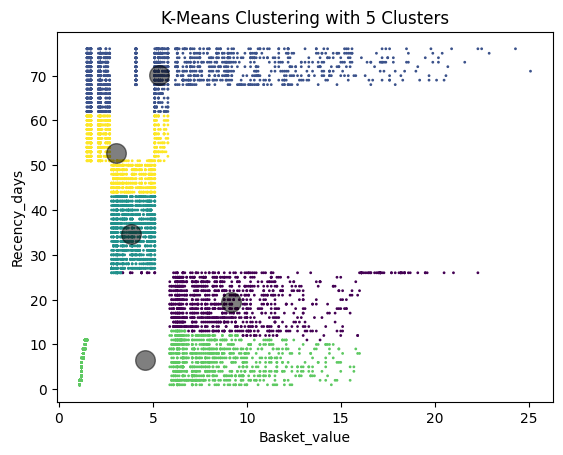

In [49]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
X=transaction_binary[['basket_value', 'recency_days']]
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X)
transaction_binary['cluster'] = y

plt.scatter(transaction_binary['basket_value'], transaction_binary['recency_days'], c=y, s=1, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Basket_value')
plt.ylabel('Recency_days')
plt.title('K-Means Clustering with 5 Clusters')
plt.show()

In [50]:
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category,basket_value,recency_days,cluster
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket,1.1,2,3
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket,3.6,31,2
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket,1.2,7,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket,6.6,7,3
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket,2.5,66,1


In [51]:
# Select only the "basket value" and "recency days" columns
transaction_binary_subset = transaction_binary[["basket_value", "recency_days"]]

# Calculate the mean of each feature for each cluster
cluster_means = transaction_binary_subset.groupby(transaction_binary['cluster']).mean()
cluster_std = transaction_binary_subset.groupby(transaction_binary['cluster']).std()
cluster_count = transaction_binary_subset.groupby(transaction_binary['cluster']).count()

# Print statistics for each cluster (including mean and std for basket value and recency days)
for i in range(5):
    print(f"Cluster {i}:")
    print(f"Count={cluster_count.iloc[i][0]}")
    print(f"Mean (basket_value, recency_days)={tuple(cluster_means.iloc[i])}")
    print(f"Std (basket_value, recency_days)={tuple(cluster_std.iloc[i])}")
    print("-------------------------------")

Cluster 0:
Count=1062
Mean (basket_value, recency_days)=(9.147551789077214, 19.61111111111111)
Std (basket_value, recency_days)=(2.971670930532185, 4.248012108013503)
-------------------------------
Cluster 1:
Count=1986
Mean (basket_value, recency_days)=(5.3254783484390735, 70.23212487411884)
Std (basket_value, recency_days)=(4.233303894329771, 3.892898037451095)
-------------------------------
Cluster 2:
Count=1289
Mean (basket_value, recency_days)=(3.8401861908456167, 34.65787432117921)
Std (basket_value, recency_days)=(0.7539638293640378, 5.028036502258465)
-------------------------------
Cluster 3:
Count=1914
Mean (basket_value, recency_days)=(4.587722048066875, 6.453500522466039)
Std (basket_value, recency_days)=(3.9379532675412774, 3.204998183175067)
-------------------------------
Cluster 4:
Count=1285
Mean (basket_value, recency_days)=(3.0612451361867703, 52.63346303501945)
Std (basket_value, recency_days)=(1.2526513960713561, 5.161893163891675)
-------------------------------

/tmp/ipykernel_16290/603196878.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Count={cluster_count.iloc[i][0]}")


Ομάδα 0 --> “Ομάδα παλιών συναλλαγών **μεγάλης** αξίας που
αντιπροσωπεύει το 24% του συνόλου των συναλλαγών”

Ομάδα 1 --> “Ομάδα πρόσφατων συναλλαγών **μεγάλης** αξίας που
αντιπροσωπεύει το 27% του συνόλου των συναλλαγών”

Ομάδα 2 --> “Ομάδα παλιών συναλλαγών **μέτριας** αξίας που
αντιπροσωπεύει το 16% του συνόλου των συναλλαγών”

Ομάδα 3 --> “Ομάδα πρόσφατων συναλλαγών **μεγάλης** αξίας που
αντιπροσωπεύει το 16% του συνόλου των συναλλαγών”

Ομάδα 4 --> “Ομάδα παλιών συναλλαγών **μικρής** αξίας που
αντιπροσωπεύει το 15% του συνόλου των συναλλαγών”

Η ομάδα 0 θα πρέπει να ανησυχεί το τμήμα μάρκετινγκ. Χρειάζεται να ασχοληθούν.

Μετατροπή σε δυαδική μορφή

In [52]:
for i in range(5):
  temp_list = []
  for k in transaction_binary['cluster']:
    if i == k:
      val = 1
    else:
      val = 0
    temp_list.append(val)
  transaction_binary[f'Cluster{i}'] = temp_list

In [53]:
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,...,yogurt,basket_value_category,basket_value,recency_days,cluster,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4
0,0,0,1,0,0,0,0,0,0,0,...,0,low_value_basket,1.1,2,3,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,medium_value_basket,3.6,31,2,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,low_value_basket,1.2,7,3,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,high_value_basket,6.6,7,3,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,low_value_basket,2.5,66,1,0,1,0,0,0


# Συνδυαστική αξιοποίηση μεθόδων: περιγραφή προϊοντικού και γενικού προφίλ ομάδων με χρήση κανόνων συσχέτισης


Δημιουργούμε δύο λίστες.
Μια με προϊόντα και τις ομάδες των συναλλαγών.
Μια με προϊόντα, τις ομάδες των
συναλλαγών και την διακριτοποιημένη αξία καλαθιού.

In [54]:
import copy
filtered_items_cl = copy.deepcopy(filtered_items)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_cl[i].append(str(transaction_binary['cluster'][i]))

filtered_items_bc_cl = copy.deepcopy(filtered_items_cl)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_bc_cl[i].append(transaction_binary['basket_value_category'][i])

filtered_items_cl[1]

['tropical fruit', 'yogurt', '2']

Βρίσκουμε τους 20 κανόνες με το υψηλότερο confidence αποκλειστικά
για τα προϊόντα και τις ομάδες των συναλλαγών

In [55]:
results = list(apriori(filtered_items_cl, min_support=0.037, min_lift=1))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]}, with Confidence: {rule.confidence:.2f}')

['pastry'] -> ['1'], with Confidence: 1.00
['pastry', 'whole milk'] -> ['1'], with Confidence: 1.00
['whole milk', '1'] -> ['pastry'], with Confidence: 0.65
['root vegetables'] -> ['whole milk'], with Confidence: 0.45
['0'] -> ['whole milk'], with Confidence: 0.45
['1'] -> ['pastry'], with Confidence: 0.44
['sausage'] -> ['0'], with Confidence: 0.44
['3'] -> ['whole milk'], with Confidence: 0.44
['root vegetables'] -> ['other vegetables'], with Confidence: 0.43
['tropical fruit'] -> ['whole milk'], with Confidence: 0.40
['yogurt'] -> ['whole milk'], with Confidence: 0.40
['other vegetables'] -> ['whole milk'], with Confidence: 0.39
['0'] -> ['sausage'], with Confidence: 0.38
['0'] -> ['other vegetables'], with Confidence: 0.38
['pastry'] -> ['whole milk'], with Confidence: 0.37
['pastry'] -> ['whole milk', '1'], with Confidence: 0.37
['pastry', '1'] -> ['whole milk'], with Confidence: 0.37
['citrus fruit'] -> ['whole milk'], with Confidence: 0.37
['0'] -> ['rolls/buns'], with Confidenc

Το Pastry σχετίζεται αρκετά με την ομάδα 0.

Το whole_milk σχετίζεται αρκετά με την ομάδα 1.

Ο συνδυασμός ['whole milk', 'pastry'] αγοράζεται πολύ απο την ομάδα 0.
Αυτή, πρέπει να ανησυχεί το τμήμα μάρκετινγκ, και σχετίζεται με το προιον pastry. Μπορεί η ποιοτητά του όλο αυτον τον καιρό να φθήνει, εξού και η μείωση εμφανισής του στις συναλλαγές.

Βρίσκουμε τους 20 κανόνες με το υψηλότερο confidence για τα προϊόντα, τις ομάδες των συναλλαγών και την διακριτοποιημένη αξία καλαθιού

In [56]:
results = list(apriori(filtered_items_bc_cl, min_support=0.037, min_lift=1))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]}, with Confidence: {rule.confidence:.2f}')

['pastry'] -> ['1'], with Confidence: 1.00
['2'] -> ['medium_value_basket'], with Confidence: 1.00
['sausage', '0'] -> ['high_value_basket'], with Confidence: 1.00
['high_value_basket', '1'] -> ['pastry'], with Confidence: 1.00
['pastry', 'high_value_basket'] -> ['1'], with Confidence: 1.00
['pastry', 'medium_value_basket'] -> ['1'], with Confidence: 1.00
['pastry', 'whole milk'] -> ['1'], with Confidence: 1.00
['other vegetables', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['rolls/buns', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['soda', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['whole milk', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['rolls/buns', '3'] -> ['high_value_basket'], with Confidence: 1.00
['3', 'sausage'] -> ['high_value_basket'], with Confidence: 1.00
['rolls/buns', 'sausage'] -> ['high_value_basket'], with Confidence: 1.00
['whole milk', 'sausage'] -> ['high_value_basket'], with Confidence: 1.00
['0', 'yogurt'] -> ['hig

Παρατηρούμε από τον κανόνα ['2'] -> ['medium_value_basket'] οτι όλες οι συναλλαγές της ομάδας 2 είναι μέτριας αξίας.

['sausage', '3'] -> ['high_value_basket'] μας δείχνει οτι το sausage εχει υψηλό κόστος και βρίσκεται στην ομάδα 3. Αντίστοιχα, και για το ['3', 'yogurt'] -> ['high_value_basket'].



